In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/pandas-dev/pandas.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [4]:
df_commits.to_csv('DF Commits Pandas.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits Pandas.csv")

In [6]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,9d0080576446de475d34b0dbb58389b15cd4f529,Initial directory structure.\n\ngit-svn-id: ht...,Wes McKinney,wesmckinn@gmail.com,2009-07-31 15:07:16+00:00,Wes McKinney,wesmckinn@gmail.com,2009-07-31 15:07:16+00:00
1,ec1a0a2a2571dc2c1c26612b374d4a66b22f0938,adding trunk\n\ngit-svn-id: http://pandas.goog...,Wes McKinney,wesmckinn@gmail.com,2009-08-05 02:32:49+00:00,Wes McKinney,wesmckinn@gmail.com,2009-08-05 02:32:49+00:00
2,1eeadf4e401647faa20911f531bc05c1872262ea,oops\n\ngit-svn-id: http://pandas.googlecode.c...,Wes McKinney,wesmckinn@gmail.com,2009-08-05 02:33:13+00:00,Wes McKinney,wesmckinn@gmail.com,2009-08-05 02:33:13+00:00
3,445114e1b20da8d4976c8d9050aa90c5bd508c54,added svn:ignore\n\ngit-svn-id: http://pandas....,Wes McKinney,wesmckinn@gmail.com,2009-08-05 03:17:29+00:00,Wes McKinney,wesmckinn@gmail.com,2009-08-05 03:17:29+00:00
4,c6b236db73ff81007909be6406f0e484edc4a9eb,first commit with cleaned up code\n\ngit-svn-i...,Wes McKinney,wesmckinn@gmail.com,2009-08-05 03:30:16+00:00,Wes McKinney,wesmckinn@gmail.com,2009-08-05 03:30:16+00:00
...,...,...,...,...,...,...,...,...
35601,4f328f08df90906198b3a3f955ab321018964f0a,TST (string dtype): resolve all infer_string T...,Joris Van den Bossche,jorisvandenbossche@gmail.com,2024-10-10 15:19:55+02:00,GitHub,noreply@github.com,2024-10-10 15:19:55+02:00
35602,97c4ce390ae7dafb7f58a21184cc32d921edb6c6,Bump pypa/cibuildwheel from 2.20.0 to 2.21.0 (...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2024-10-10 11:02:14-07:00,GitHub,noreply@github.com,2024-10-10 11:02:14-07:00
35603,2b9ca0734ead966146321fa22d009d5eb186eb0b,"STY: Bump pyright, pyupgrade and mypy for new ...",Matthew Roeschke,10647082+mroeschke@users.noreply.github.com,2024-10-10 12:15:00-10:00,GitHub,noreply@github.com,2024-10-10 15:15:00-07:00
35604,f1bdd0fa571e8689274c8dc7ba62ae503d74a568,DOC: Fix `GroupBy.ffill()` doc reference to ro...,Sparsh Sah,sparshsah@gmail.com,2024-10-11 10:19:44-07:00,GitHub,noreply@github.com,2024-10-11 10:19:44-07:00


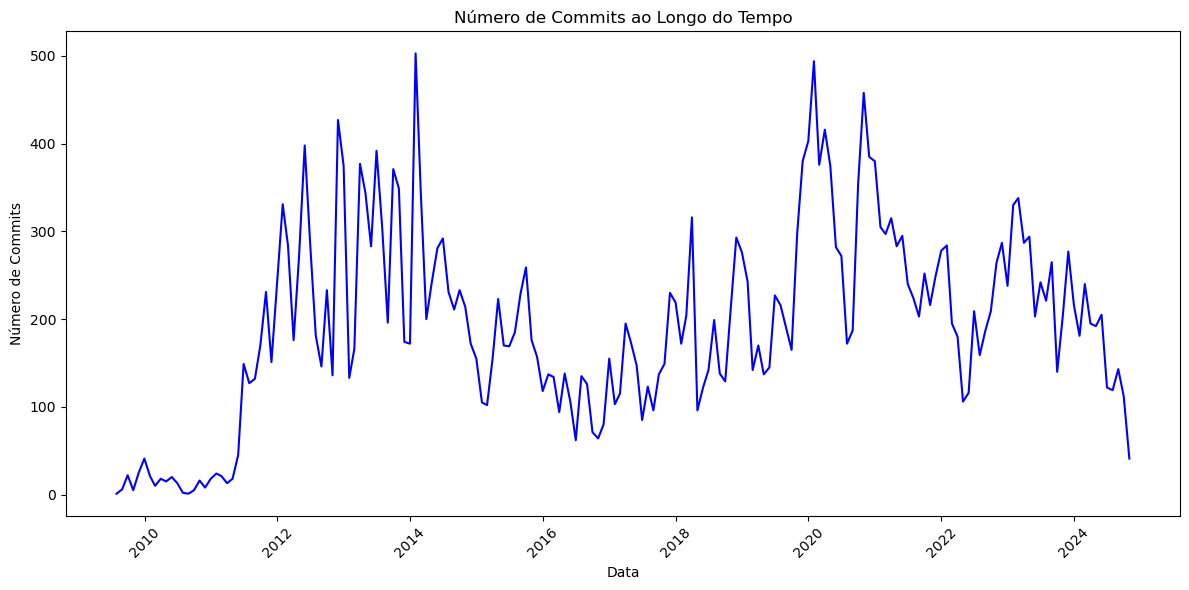

In [3]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


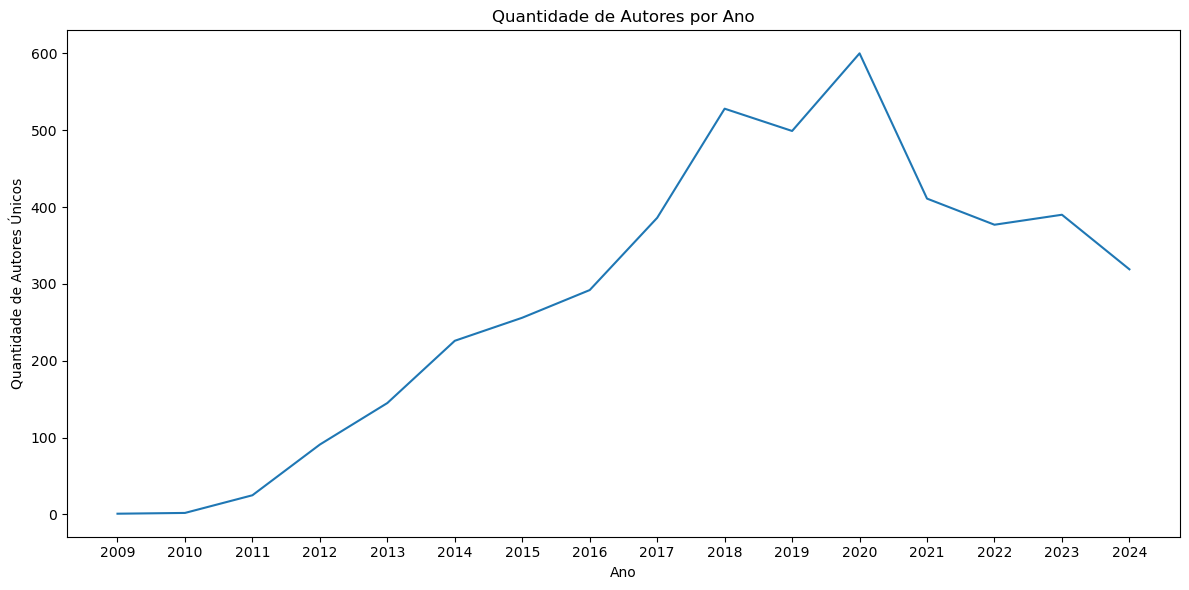

In [3]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano da coluna 'author_date'
df_commits['year'] = df_commits['author_date'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_commits.groupby('year')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'committer_date'


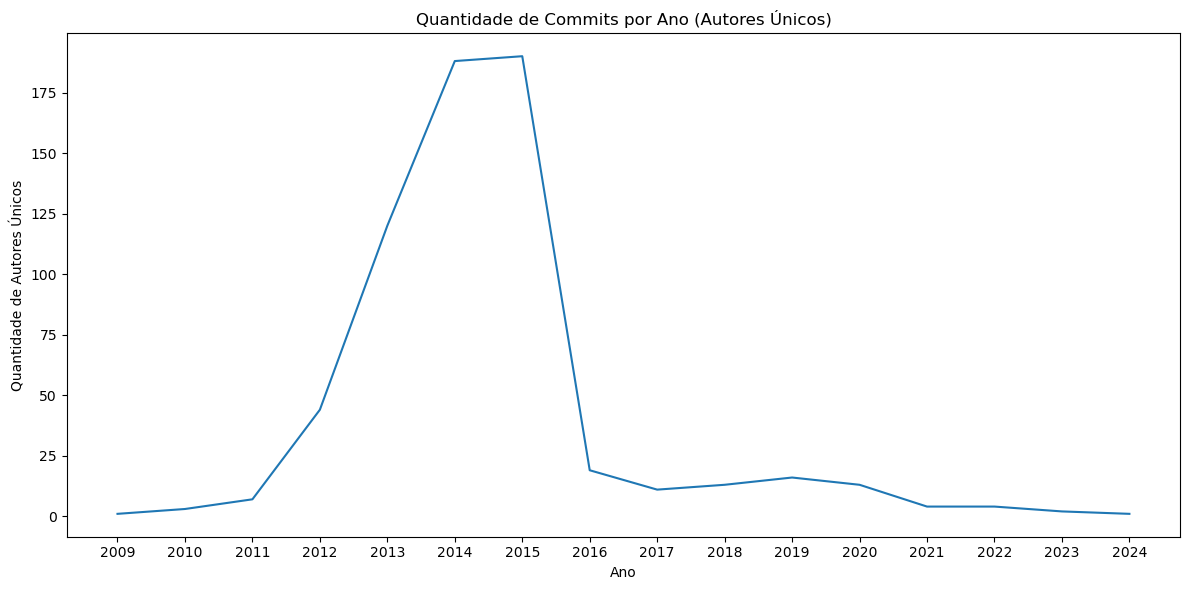

In [4]:
# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano da coluna 'committer_date'
df_commits['year'] = df_commits['committer_date'].dt.year

# Contar o número de autores (committer_email) únicos por ano
authors_per_year = df_commits.groupby('year')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Ano (Autores Únicos)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()
